In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Recommendation System/zomato_cleaned_40%.csv')

In [ ]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/dasaprakash-c...,"Lower walkway, Rangoli Metro Art Center, Boule...",Dasaprakash Cafe,No,No,3.2,10,+91 9845083676,MG Road,Cafe,NaN,Cafe,400,"[('Rated 4.0', ""RATED\n Had the filter coffee...",[],Dine-out,Lavelle Road
1,https://www.zomato.com/bangalore/zaica-dine-wi...,"125, 1st Floor, Mahadevanpura Post, Brookefiel...",Zaica Dine & Wine,Yes,Yes,3.8,818,080 41162485,Brookefield,"Casual Dining, Bar","Lemon Chicken, Egg Curry, Malai Kofta, Veg Sta...",North Indian,750,"[('Rated 4.0', 'RATED\n Decent place for a di...","['Lemony Chicken Tikka', 'Kadai Paneer Patiyal...",Dine-out,Brookefield
2,https://www.zomato.com/bangalore/deckers-lane-...,"Kundanahalli Gate, Sai Baba Temple Road, Next ...",Decker's Lane,Yes,No,2.1,243,+91 7829447722,Marathahalli,Quick Bites,"Rolls, Rasgulla, Fish Fry, Bhetki Paturi, Mutt...",Bengali,400,"[('Rated 2.0', 'RATED\n Initially I was prett...",[],Dine-out,Marathahalli
3,https://www.zomato.com/bangalore/la-passion-ca...,"36, Jaya Bheema Nagar, Layout 1, BTM, Bangalore",La Passion Cafe,Yes,No,3.7,0,+91 8217706039,BTM,Cafe,NaN,Cafe,500,[],"['Chhole Bhature', 'Aloo Paratha', 'Poha', 'Sp...",Desserts,BTM
4,https://www.zomato.com/bangalore/classic-lassi...,"Skywalk, 5/1, Near Body Craft, Assaye Road, Ul...",Classic Lassi Shop,Yes,No,3.5,43,+91 8792958786\r\r\r\n+91 8073579529,Ulsoor,Beverage Shop,NaN,"Beverages, Ice Cream",150,"[('Rated 3.0', 'RATED\n I have mixed feeling ...",[],Delivery,Church Street


In [ ]:
data=data.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'], axis=1)

In [ ]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [ ]:
data.shape

(20619, 11)

In [ ]:
data.count()

,0
name,20619
online_order,20619
book_table,20619
rate,20619
votes,20619
location,20609
rest_type,20523
dish_liked,9374
cuisines,20601
approx_cost(for two people),20466


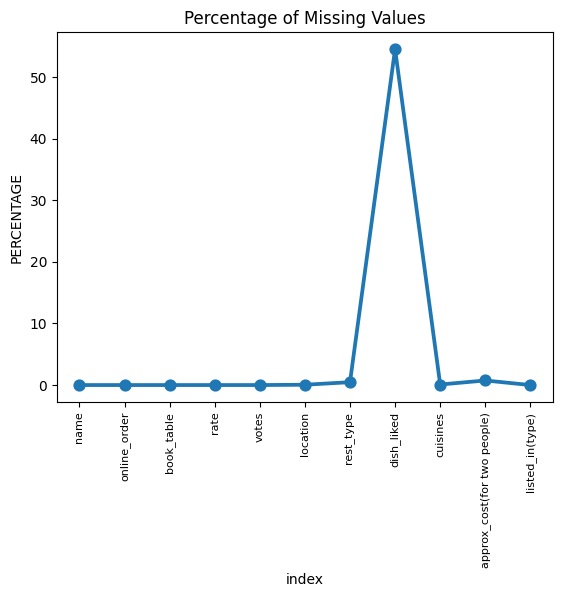

In [ ]:
missing=pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
ax=sns.pointplot(data=missing,x='index',y=0)
plt.xticks(rotation=90,fontsize=8)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

Handling missing values

In [ ]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].str.replace(',','')
pd.to_numeric(data['approx_cost(for two people)'])

,approx_cost(for two people)
0,400.0
1,750.0
2,400.0
3,500.0
4,150.0
...,...
20614,300.0
20615,200.0
20616,550.0
20617,1000.0


In [ ]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype('Int64')
median_rate=data['approx_cost(for two people)'].median()
data['approx_cost(for two people)']=data['approx_cost(for two people)'].fillna(median_rate)

In [ ]:
data['rest_type']=data['rest_type'].fillna('unknown')
data['cuisines']=data['cuisines'].fillna('unknown')
data['location']=data['location'].fillna('unknown')

In [ ]:
data.count()

,0
name,20619
online_order,20619
book_table,20619
rate,20619
votes,20619
location,20619
rest_type,20619
dish_liked,9374
cuisines,20619
approx_cost(for two people),20619


Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(data['cuisines'])

0                                    Cafe
1                            North Indian
2                                 Bengali
3                                    Cafe
4                    Beverages, Ice Cream
                       ...               
20614                        North Indian
20615                        North Indian
20616      Chinese, North Indian, Biryani
20617    North Indian, Chinese, Fast Food
20618               North Indian, Biryani
Name: cuisines, Length: 20619, dtype: object


In [ ]:
data['cuisines']=data['cuisines'].str.lower()

In [ ]:
data['dish_liked'] = data['dish_liked'].str.lower()
data['name']=data['name'].str.lower()
data['dish_liked'] = data['dish_liked'].fillna('')

Creating Combined Features

In [ ]:
data['combined_features']=data['name']+' '+data['dish_liked']+' '+data['cuisines']

Standardizing Numeric values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data[['rate','votes','approx_cost(for two people)']]=scaler.fit_transform(data[['rate','votes','approx_cost(for two people)']])

Applying tfidf vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
print("Shape of TF-IDF Matrix 1:", tfidf_matrix.shape)

Shape of TF-IDF Matrix 1: (20619, 6123)


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
#similarity matrix
similarity_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])

In [ ]:
print(similarity_df)

name                   dasaprakash cafe  zaica dine & wine  decker's lane  \
name                                                                        
dasaprakash cafe               1.000000           0.000000       0.000000   
zaica dine & wine              0.000000           1.000000       0.030670   
decker's lane                  0.000000           0.030670       1.000000   
la passion cafe                0.282828           0.000000       0.000000   
classic lassi shop             0.000000           0.000000       0.000000   
...                                 ...                ...            ...   
dil punjabi                    0.000000           0.023643       0.000000   
allana kabab                   0.000000           0.023643       0.000000   
chinese chaska                 0.000000           0.054188       0.000000   
chin lung resto-bar            0.000000           0.024443       0.031374   
new prince restaurant          0.000000           0.043438       0.000000   

In [ ]:
print("Shape of similarity_df:", similarity_df.shape)
print("First few rows of similarity_df:\n", similarity_df.head())

Shape of similarity_df: (20619, 20619)
First few rows of similarity_df:
 name                dasaprakash cafe  zaica dine & wine  decker's lane  \
name                                                                     
dasaprakash cafe            1.000000            0.00000        0.00000   
zaica dine & wine           0.000000            1.00000        0.03067   
decker's lane               0.000000            0.03067        1.00000   
la passion cafe             0.282828            0.00000        0.00000   
classic lassi shop          0.000000            0.00000        0.00000   

name                la passion cafe  classic lassi shop  \
name                                                      
dasaprakash cafe           0.282828                 0.0   
zaica dine & wine          0.000000                 0.0   
decker's lane              0.000000                 0.0   
la passion cafe            1.000000                 0.0   
classic lassi shop         0.000000                 1.

In [ ]:
def recommend_restaurants(restaurant_name, top_n):
    restaurant_name = restaurant_name.strip()

    # Check if the restaurant exists in the index
    if restaurant_name not in similarity_df.index:
        return "Restaurant not found."

    # Get the similarity scores for the specified restaurant
    similarity_scores = similarity_df.loc[restaurant_name].iloc[0]  # Select first row if it's a DataFrame

    # Ensure similarity_scores is a Series
    if isinstance(similarity_scores, pd.Series):
        # Sort the Series of similarity scores
        similar_restaurants = similarity_scores.sort_values(ascending=False)

        # Get the top N recommended restaurants, excluding the input restaurant
        recommended_restaurants = similar_restaurants[similar_restaurants.index != restaurant_name].head(top_n)  # Exclude itself

        # Deduplicate and convert to list
        unique_recommendations = list(dict.fromkeys(recommended_restaurants.index.tolist()))  # Using dict.fromkeys to maintain order and deduplicate

        # Return only the top N unique recommendations
        return unique_recommendations[:top_n]
    else:
        return "Failed to get similarity scores."

In [ ]:
recommended = recommend_restaurants("flechazo", top_n=10)
print(f"Recommended restaurants for the given restaurant: {recommended}")

Recommended restaurants for the given restaurant: ['sheesh kebab', "ab's - absolute barbecues", "meeraa's beegara oota", 'barbeque nation', 'the black pearl']
